Рабочая тетрадь №4 Мурдасов И.А./ ИМБО-01-24

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

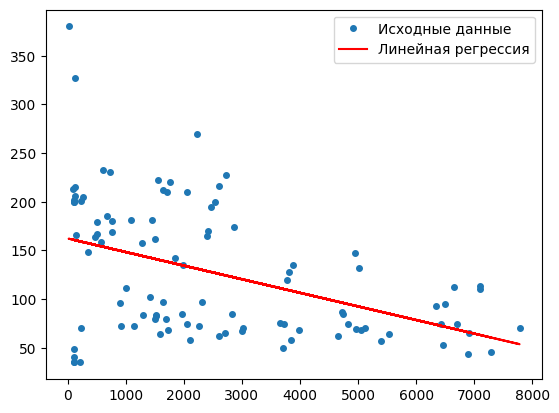

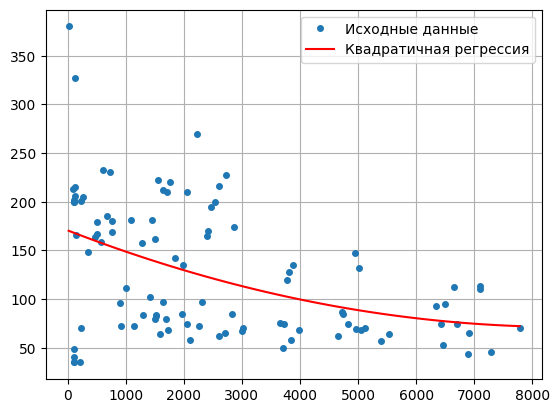

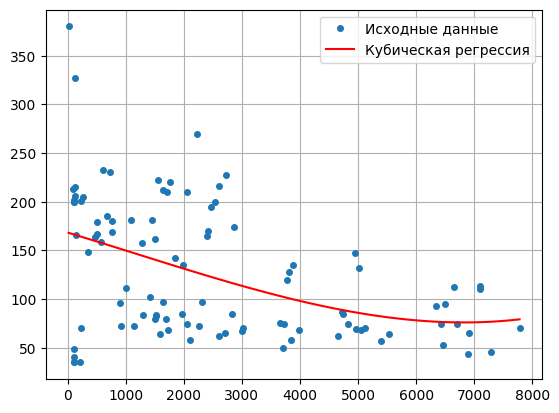

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных, выборка x и y
url = "https://raw.githubusercontent.com/akmand/datasets/refs/heads/main/airlines.csv"
df = pd.read_csv(url)
x = df.iloc[:100, 1]
y = df.iloc[:100, -2]

# эстраполяционный полином первого порядка 
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x, m*x + c, 'r', label='Линейная регрессия')
plt.legend()
plt.show()

# эстраполяционный полином второго порядка 
m = np.vstack([x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(min(x), max(x), 100)
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], 'r', label='Квадратичная регрессия')
plt.legend()
plt.grid()
plt.show()

# эстраполяционный полином третьего порядка 
m = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(min(x), max(x), 100)
plt.plot(x, y, 'o', label='Исходные данные', markersize=4)
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], 'r', label='Кубическая регрессия')
plt.legend()
plt.grid()
plt.show()

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.


Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv


Задача: Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО. Расчеты проводятся вручную с указанием формул, применяемых для определения коэффициентов и подробных расчетов (сдаются на листке преподавателю, письменный опрос). В тетрадке Jupyter Notebook решение реализуется методами на усмотрение студента.
Вариант выбирается по последней цифре номера студенческого билета. 
Если номер заканчивается на 1, то вариант 1, на ноль – вариант 10.
